In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
%matplotlib inline

## Read the data

In [4]:
building_metadata = pd.read_csv('building_metadata.csv')
train = pd.read_csv('train.csv')
weather_train = pd.read_csv('weather_train.csv')

In [5]:
building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [6]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [7]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


## Building_metadata

In [8]:
building_metadata.count()

site_id        1449
building_id    1449
primary_use    1449
square_feet    1449
year_built      675
floor_count     355
dtype: int64

In [9]:
building = building_metadata.groupby('primary_use')['site_id'].count()

Text(0.5,1,'Number of Building Use')

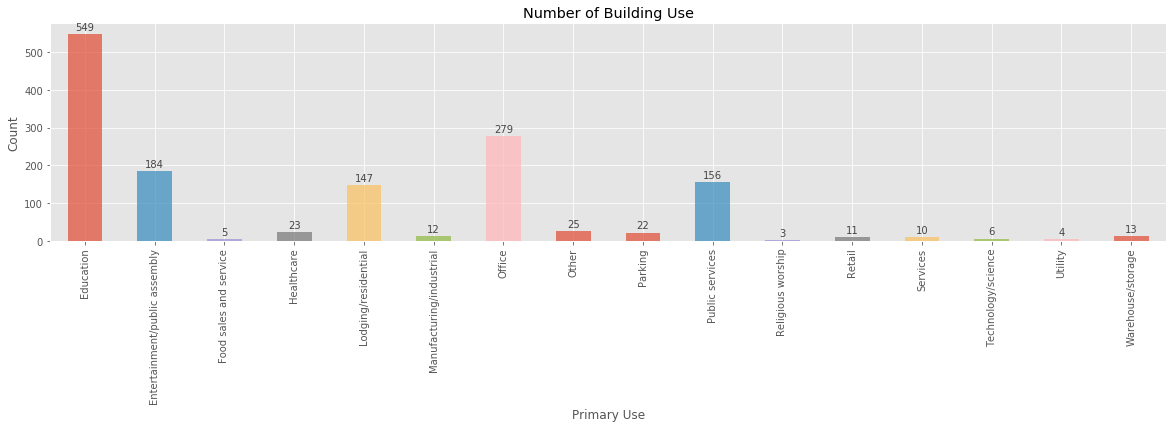

In [10]:
building_metadata.groupby('primary_use')['site_id'].count().plot(kind='bar', figsize=(20, 4), alpha=0.7)
for i in range(0, 16):
    plt.text(i, building[i]+5, building[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("Primary Use")
plt.ylabel("Count")
plt.title("Number of Building Use")

Text(0.5,1,'Numbers of Building Builded Each Year')

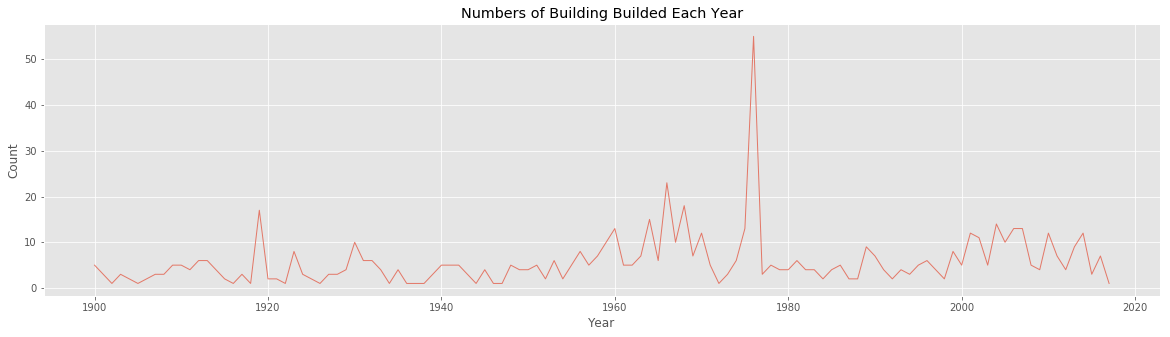

In [11]:
building = building_metadata.groupby("year_built").count()
building["year_built"] = building.index

plt.figure(figsize=(20, 5))
plt.plot(building["year_built"], building["site_id"], linewidth=1, alpha = 0.7)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Numbers of Building Builded Each Year")

## Train Data

#### Total 1448 building
#### 4 kinds of meter (0: electricity, 1: chilledwater, 2: steam, 3: hotwater). Not every building has all meter types
#### Time interval : 2016-01-01 00:00:00 - 2016-12-31 23:00:00

In [12]:
train.meter.count()

20216100

In [13]:
train.groupby(['building_id','meter']).count()

timestamp  meter_reading
building_id meter                          
0           0           8784           8784
1           0           8784           8784
2           0           8784           8784
3           0           8784           8784
4           0           8784           8784
5           0           8784           8784
6           0           8784           8784
7           0           8784           8784
            1           7267           7267
8           0           8784           8784
9           0           8784           8784
            1           7265           7265
10          0           8784           8784
11          0           8784           8784
12          0           8784           8784
13          0           8784           8784
            1           6940           6940
14          0           8784           8784
            1           7269           7269
15          0           8784           8784
            1           7269           7269
16          0           8784           8784
17          0           8784           8784
18          0           8784           8784
19          0           8784           8784
20          0           8784           8784
21          0           8784           8784
22          0           8784           8784
23          0           8784           8784
24          0           8784           8784
...                      ...            ...
1427        2           7472           7472
1428        0           7380           7380
1429        0           7456           7456
1430        0           5348           5348
            2           7472           7472
1431        0           7472           7472
            2           7472           7472
1432        0           7472           7472
1433        0           7469           7469
            2           7472           7472
1434        0           7407           7407
            2           7472           7472
1435        0           7472           7472
1436        0           7472           7472
            2           7468           7468
1437        0           7472           7472
            2           7470           7470
1438        0           7472           7472
            2           7466           7466
1439        0           7472           7472
1440        0           7468           7468
1441        0           7470           7470
1442        0           7472           7472
            2           7472           7472
1443        0           7472           7472
1444        0           7445           7445
1445        0           7449           7449
1446        0           7472           7472
1447        0           7471           7471
1448        0           7452           7452

[2380 rows x 2 columns]

## Combine building_metadata, train and weather_train

In [14]:
data = pd.merge(building_metadata, train, how= 'left', on= 'building_id')

In [15]:
train.count()

building_id      20216100
meter            20216100
timestamp        20216100
meter_reading    20216100
dtype: int64

In [16]:
data.count()

site_id          20216100
building_id      20216100
primary_use      20216100
square_feet      20216100
year_built        8088455
floor_count       3506933
meter            20216100
timestamp        20216100
meter_reading    20216100
dtype: int64

In [17]:
data = pd.merge(data, weather_train, how= 'left', on= ['site_id', 'timestamp'])

In [18]:
data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [36]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
## 0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'
data['dayofweek'] = data['timestamp'].dt.dayofweek

In [37]:
data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,year,month,day,hour,dayofweek
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,0,4
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0,24.4,...,21.1,-1.0,1020.2,70.0,1.5,2016,1,1,1,4
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0,22.8,...,21.1,0.0,1020.2,0.0,0.0,2016,1,1,2,4
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0,21.1,...,20.6,0.0,1020.1,0.0,0.0,2016,1,1,3,4
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0,20.0,...,20.0,-1.0,1020.0,250.0,2.6,2016,1,1,4,4


In [38]:
data.to_csv('data.csv')